In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
twitter_path="C:/Users/Fakeha Rahman/Desktop/Sentiment Analysis/data/Twitter_Sentiment_Analysis/train.csv"
hate_speech_path="C:/Users/Fakeha Rahman/Desktop/Sentiment Analysis/data/Hate_Speech_and_Offensive_Language_Dataset/labeled_data.csv"

In [6]:
twitter_df=pd.read_csv(twitter_path)
hate_df=pd.read_csv(hate_speech_path)

In [7]:
twitter_df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
twitter_df["label"].unique()

array([0, 1], dtype=int64)

In [9]:
twitter_df.drop("id", axis=1, inplace=True)

C:\Users\Fakeha Rahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

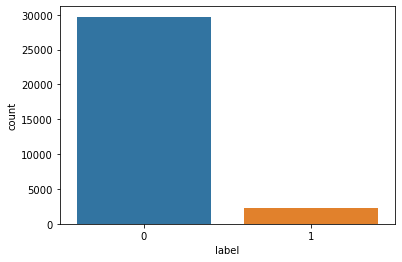

In [10]:
import seaborn as sns
sns.countplot('label',data=twitter_df)

In [11]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
hate_df.drop(["Unnamed: 0","count",  "hate_speech", "offensive_language", "neither"], axis=1, inplace=True)

C:\Users\Fakeha Rahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

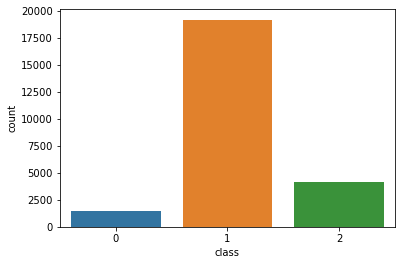

In [13]:
sns.countplot("class", data=hate_df)

In [14]:
hate_df["class"] = hate_df["class"].replace({0:1, 2:0})

In [15]:
hate_df.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [16]:
hate_df["class"].unique()

array([0, 1], dtype=int64)

C:\Users\Fakeha Rahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

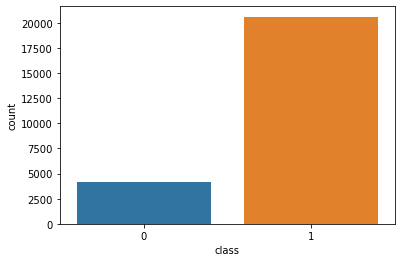

In [17]:
sns.countplot("class", data=hate_df) #0 is non offensice and 1 is offensive

In [18]:
hate_df=hate_df.rename(columns={"class": "label"})

In [19]:
twitter_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [20]:
hate_df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
# twitter_df.concat(hate_df)
df=pd.concat([twitter_df, hate_df])

In [22]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


C:\Users\Fakeha Rahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

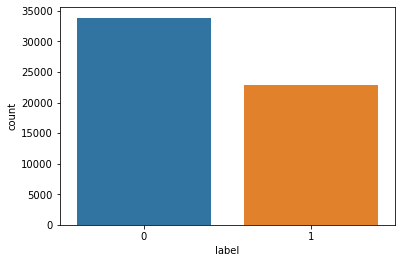

In [23]:
sns.countplot("label", data=df)

In [24]:
df.shape

(56745, 2)

In [25]:
df["label"].isnull().sum()

0

In [26]:
df.iloc[15600]['tweet']

'#sukhbir #badal announces office-bearers of   west coast zone #america and #california  '

In [27]:
# testing = df.iloc[503]['tweet'].decode("utf-8-sig")
# testing

In [28]:
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()

In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', "", text) #removes mentions
    text=re.sub(r'https?://[A-Za-z0-9./]+', "", text) #removes links
    text=re.sub("[^a-zA-Z]", " ", text) # removes #
    text = re.sub('\n', '', text) # removes new line
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation marks
    text=re.sub(' +', ' ', text) # remove more than on espace
    text= text.lower()
    text=[word for word in text.split(" ") if word not in stopwords.words('english') ] #removes stopwrds
    text=" ".join(text)
    text=[snow_stemmer.stem(word) for word in text.split(" ")] # gets root of word
    text=" ".join(text)
    return text

In [31]:
n=6561
print(df.iloc[n]['tweet'])
print(clean(df.iloc[n]['tweet']))

@user so your intelligence is picking out typos on twitter then giving yourself a congratulations wank because you told em  
 intellig pick typo twitter give congratul wank told em 


In [32]:
df["tweet"]=df["tweet"].apply(clean)

In [33]:
df.head()

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit use caus offer wheelchair v...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguid societi motiv


In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

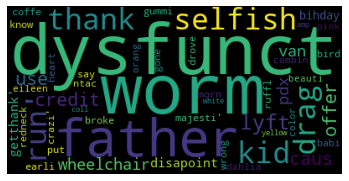

In [36]:
text = df.loc[df['label']==0, ['tweet']].values  

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
X=df['tweet']
y=df['label']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from tensorflow import keras

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [41]:
max_words=50000 #No of distinct words allowed
max_len=300 #max len of tweet
tokenizer=Tokenizer(num_words=max_words)


In [42]:
tokenizer.fit_on_texts(X_train)
sequences=tokenizer.texts_to_sequences(X_train)

In [43]:
print(sequences[0])

[544, 145, 1, 2082, 5607, 1998, 32]


In [44]:
sequence_matrix=sequence.pad_sequences(sequences, maxlen=max_len)

In [45]:
model=Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
# binary crossentropy is for 0,1 output. calculates the distance of value from 0/1.
# RMSprop - moving average of the gradient i.e closer values have more weight on the gradient than further back

In [50]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

stop=EarlyStopping(monitor="val_accuracy",
                  patience = 5,
                  mode="max")
checkpoint=ModelCheckpoint(monitor="val_accuracy",
                          mode="max",
                          save_weights_only=True,
                          filepath="./",
                          save_best_only=True)

In [51]:
history=model.fit(sequence_matrix, y_train, batch_size=512, epochs=10, validation_split=0.2, callbacks=[stop, checkpoint])

Epoch 1/10
71/71 [==============================] - 275s 4s/step - loss: 0.2784 - accuracy: 0.9051 - val_loss: 0.1676 - val_accuracy: 0.9396
Epoch 2/10
71/71 [==============================] - 246s 3s/step - loss: 0.1342 - accuracy: 0.9547 - val_loss: 0.1408 - val_accuracy: 0.9509
Epoch 3/10
71/71 [==============================] - 242s 3s/step - loss: 0.1067 - accuracy: 0.9641 - val_loss: 0.1388 - val_accuracy: 0.9506
Epoch 4/10
71/71 [==============================] - 250s 4s/step - loss: 0.0913 - accuracy: 0.9695 - val_loss: 0.1427 - val_accuracy: 0.9478
Epoch 5/10
71/71 [==============================] - 403s 6s/step - loss: 0.0825 - accuracy: 0.9727 - val_loss: 0.1435 - val_accuracy: 0.9488
Epoch 6/10
71/71 [==============================] - 540s 8s/step - loss: 0.0754 - accuracy: 0.9748 - val_loss: 0.1559 - val_accuracy: 0.9454
Epoch 7/10
71/71 [==============================] - 279s 4s/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.1564 - val_accuracy: 0.9465


In [55]:
# model.save("sentiment analysis.h5")

In [56]:
test_sequences=tokenizer.texts_to_sequences(X_test)
test_sequence_matrix=sequence.pad_sequences(test_sequences, maxlen=max_len)
model.evaluate(test_sequence_matrix, y_test)

355/355 [==============================] - 76s 213ms/step - loss: 0.1606 - accuracy: 0.9474


[0.16056837141513824, 0.9473962187767029]

In [57]:
prediction = model.predict(test_sequence_matrix)
res=[]
for preds in prediction:
    if preds<0.5:
        res.append(0)
    else:
        res.append(1)


In [58]:
X_list=X_test.tolist()

In [59]:
y_list=y_test.tolist()

In [60]:
k=0
for p in range(len(res)):
    if res[p] != y_list[p]:
        print(X_list[p], y_list[p])
        k=k+1
    if k==5:
        break;

rt happi bung hole negat desper guy spew good exampl  1
 dear versac wont buy yur retail sign pissedoffitalian 1
ate isz youuu  0
white trash taken everi chariti organ us  1
 shake bear aka two redneck sex dead bear  1


In [61]:
text="I love all people"
text=clean(text)
text=[text]
print(text)
text_sequence=tokenizer.texts_to_sequences(text)
print(text_sequence)
text_sequence_matrix=sequence.pad_sequences(text_sequence, maxlen=max_len)


['love peopl']
[[5, 30]]


In [62]:
prediction=model.predict(text_sequence_matrix)

In [63]:
print(prediction)

[[0.0190855]]
